In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# from sklearn import metrics
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the metadata
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/Baseline_100sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_noise_all_erp.csv"
path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_clear.csv"
# path='/home/sultan/EEG_CP/Withreplacement/Feature_data_wr/Trig_153_20ms_100sam_with15_equ_ERPs.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/125sam_10ms_clear_all_erp.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,263,264,265,266,267,268,269,270,271,272
0,0,0.0,8.188300e-20,2.713300e-19,5.940900e-20,5.563900e-20,1.940900e-20,1.697200e-20,1.112800e-20,2.358200e-20,...,5.485200e-21,1.998800e-20,2.806900e-20,2.505800e-20,1.462300e-20,3.594200e-20,6.442400e-20,6.292000e-20,1.335300e-20,3.196100e-20
1,1,0.0,3.317400e-20,4.967500e-20,2.960000e-20,3.297000e-20,1.250400e-20,1.227700e-20,2.476500e-20,2.297900e-20,...,4.253500e-21,4.140000e-21,1.563800e-20,2.659600e-20,6.771100e-21,6.144900e-21,2.361800e-20,3.249500e-20,7.111100e-21,2.414600e-20


In [3]:
# random state; 
rs=14;

### For aging data 

In [4]:
X=Metadata.iloc[:,2:]
y=Metadata.iloc[:,1].values
# y=Metadata['label']
# X.shape,y.shape

In [5]:
# X.head(5)

### For CP data

In [6]:
# Metadata=Metadata1.rename(columns={'0':'label'})
# X=Metadata.iloc[:,2:]; ## here we take it out the basebline zero values, which is upto 70 index
# y=Metadata['label']
# X.shape,y.shape

# Apply SVM on Data

In [7]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [8]:
from sklearn import preprocessing
# X=preprocessing.scale(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print C_range,gamma_range


(1861, 272) (1861,)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


## here I disable the l-15 clf_tune.....

In [9]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=rs)
cv = ShuffleSplit(X_train.shape[0], test_size=0.20, random_state=rs)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
# clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
# clf_Tune.fit(X_train,y_train)
# print 'Finish tuning'      

# Find Significant correlation with stability selections 

### Preprocessing of dataset with binarize the label

In [10]:
# Pre Processing 
X[0,:10]

array([ 0.85698354,  3.57714489,  2.22173774,  2.66676404,  0.96005075,
        0.94951305, -0.59291614,  1.62422007,  0.63726668, -0.57902074])

In [11]:
from sklearn import preprocessing
X=preprocessing.scale(X)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(1861, 272) (1861, 1)


In [12]:
# np.var(X[:,1])

### Randomized Logistic Regression 

In [13]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm

# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [14]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=5).fit(X, y)
# print lars_cv.alpha_
lars_cv.alphas_

array([0.00474719, 0.004445  , 0.0043454 , 0.00389411, 0.00323297,
       0.00301063, 0.00282212, 0.00241301, 0.00233517, 0.00214162,
       0.00207016, 0.00202679, 0.00183609])

In [15]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print alphas
clf = RandomizedLasso(alpha=alphas,random_state=rs,max_iter=1000).fit(X, y)

[0.00474719 0.00427247 0.00379775 0.00332303 0.00284831 0.00237359
 0.00189888 0.00142416 0.00094944 0.00047472]


In [16]:
clf.scores_

array([0.545, 0.   , 0.   , 0.01 , 0.21 , 0.   , 0.   , 0.005, 0.   ,
       0.   , 0.   , 0.125, 0.   , 0.25 , 0.435, 0.   , 0.005, 0.01 ,
       0.   , 0.   , 0.025, 0.005, 0.48 , 0.215, 0.   , 0.005, 0.525,
       0.   , 0.   , 0.015, 0.075, 0.6  , 0.4  , 0.105, 0.01 , 0.   ,
       0.05 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.385, 0.   , 0.21 ,
       0.015, 0.   , 0.   , 0.295, 0.025, 0.065, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.505, 0.255, 0.   , 0.01 , 0.   , 0.355, 0.03 ,
       0.   , 0.04 , 0.08 , 0.01 , 0.01 , 0.25 , 0.   , 0.   , 0.   ,
       0.28 , 0.   , 0.005, 0.   , 0.   , 0.   , 0.005, 0.29 , 0.   ,
       0.105, 0.315, 0.   , 0.035, 0.01 , 0.005, 0.   , 0.025, 0.025,
       0.27 , 0.3  , 0.   , 0.005, 0.21 , 0.   , 0.   , 0.025, 0.105,
       0.225, 0.3  , 0.12 , 0.   , 0.   , 0.135, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.12 , 0.   , 0.3  , 0.   , 0.   , 0.   , 0.335,
       0.   , 0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.24 , 0.095,
       0.   , 0.035,

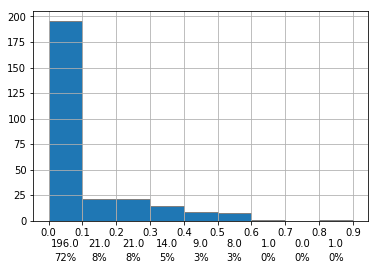

In [17]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2) ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [18]:
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [19]:
Th_2_Bins_Index= np.where((bins<=1.0) & (bins>=0.0)) # take the bins within a range
# print Th_2_Bins_Index
print bins
Th_2_Bins=bins[Th_2_Bins_Index]
print Th_2_Bins

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [20]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(1861, 272) (1861, 1)
(1488, 272) (373, 272) (1488, 1) (373, 1)


In [21]:
X_train[:,1:10]

array([[-0.10530797, -0.50109287, -0.3813928 , ..., -0.4724181 ,
        -0.72507943, -0.45280982],
       [-0.11126182, -0.048831  , -0.05354357, ..., -0.28385045,
        -0.49082333, -0.51586865],
       [-0.06294528, -0.72920398, -0.73297061, ...,  0.79677362,
        -0.00521368, -0.36303792],
       ...,
       [-0.33275419, -0.58876741, -0.70906827, ..., -0.15394619,
        -0.43636694, -0.64425125],
       [ 0.51412565, -0.48168153, -0.01851368, ..., -0.49261756,
        -0.03107975, -0.16596077],
       [-0.27295078,  0.41743157,  0.42464229, ..., -0.00141193,
        -0.13376367, -0.13743574]])

In [22]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [23]:
# C_range = np.logspace(-2, 2, 5)
C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))],y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 325 out of 325 | elapsed:   49.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 2, 4, 6, 8, 10, 12, 15, 16, 20, 30, 40, 100], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [24]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))])

print accuracy_score(y_test, y_p)

0.9544235924932976


In [25]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=rs)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [1,0.5, 0.25,0.01,0.002]
# gamma_range = [0.01,0.002,0.0006,0.0007]
# gamma_range = [0.1,0.01,0.002,0.0005,0.0006,0.0007,]
# C_range = [20, 30,50]
# C_range=[1000,1500]
# C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
# gamma_range = [0.01,0.015, 0.018, 0.002,0.003,0.0004, 0.0005,0.0006,0.0007]; # 0.0007=1/1428 1428 = no. of features
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
SV=[]
Bins=[]
Fsc=[]
for i in Th_2_Bins:
    print i
    try:
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape
        print 'Finish tuning'
        print clf_Tune.best_estimator_

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        perf=classification_report(y_test, y_p)
        print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        print 'ACC',ACC_Th2_T,AUC_Th2_T
        SVe=float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape[0]
        print SVe
        SV.append(SVe)
#         print 'Report',classification_report(y_test, y_p)
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Fsc.append(perf)
        Bins.append(i)
    except:
        print 'error at:',i
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

0.0
(1488, 272)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   36.2s finished


(1488, 272) (1488, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 272)
ACC 0.9410187667560321 0.934050432022571
0.524193548387
0.1
(1488, 76)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.5s finished


(1488, 76) (1488, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 76)
ACC 0.9329758713136729 0.9294657026979368
0.26814516129
0.2
(1488, 55)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.7s finished


(1488, 55) (1488, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 55)
ACC 0.9142091152815014 0.9098777405513431
0.26814516129
0.3
(1488, 34)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.1s finished


(1488, 34) (1488, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 34)
ACC 0.8873994638069705 0.8840886381002763
0.288306451613
0.4
(1488, 20)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    6.3s finished


(1488, 20) (1488, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 20)
ACC 0.8525469168900804 0.8448245459354612
0.569220430108
0.5
(1488, 11)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    5.0s finished


(1488, 11) (1488, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 11)
ACC 0.8579088471849866 0.8519220596014813
0.567204301075
0.6
(1488, 3)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 118 out of 125 | elapsed:    4.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.4s finished


(1488, 3) (1488, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 3)
ACC 0.7238605898123325 0.7035796155880796
0.581317204301
0.7
(1488, 2)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 118 out of 125 | elapsed:    4.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.5s finished


(1488, 2) (1488, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 2)
ACC 0.7211796246648794 0.7093252218891437
0.631048387097
0.8
(1488, 2)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 118 out of 125 | elapsed:    4.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.5s finished


(1488, 2) (1488, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (373, 2)
ACC 0.7211796246648794 0.7093252218891437
0.631048387097
0.9
(1488,)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
error at: 0.9


In [26]:
for i in range(0,7):
    print ACC_Th2[i] 
    print i
    print (Fsc[i])

0.9410187667560321
0
             precision    recall  f1-score   support

          0       0.97      0.89      0.93       159
          1       0.92      0.98      0.95       214

avg / total       0.94      0.94      0.94       373

0.9329758713136729
1
             precision    recall  f1-score   support

          0       0.94      0.91      0.92       159
          1       0.93      0.95      0.94       214

avg / total       0.93      0.93      0.93       373

0.9142091152815014
2
             precision    recall  f1-score   support

          0       0.92      0.88      0.90       159
          1       0.91      0.94      0.93       214

avg / total       0.91      0.91      0.91       373

0.8873994638069705
3
             precision    recall  f1-score   support

          0       0.87      0.86      0.87       159
          1       0.90      0.91      0.90       214

avg / total       0.89      0.89      0.89       373

0.8525469168900804
4
             precision    recall  f

In [27]:
ACC_Th2 

[0.9410187667560321,
 0.9329758713136729,
 0.9142091152815014,
 0.8873994638069705,
 0.8525469168900804,
 0.8579088471849866,
 0.7238605898123325,
 0.7211796246648794,
 0.7211796246648794]

In [28]:
Th_2_Bins[4]

0.4

In [29]:
# Need to chage gamma range . It is selecting too many features
# Let 0.34 is our best Thr. TO get the index numer with this thr
fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[4])))
fealoc
# len(fealoc)
# Do you get it? yes > How about number of support of the model?

array([  0,  14,  22,  26,  31,  32,  56, 147, 150, 152, 168, 204, 208,
       222, 232, 233, 236, 243, 258, 269])

In [30]:
# ROI=fealoc%68
# ROI
# np.unique(ROI,return_counts=True)

In [31]:
# len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

In [32]:
# for th in Th_2_Bins:
#     clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))],y_train)
#     print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape ,y_train.shape
#     print 'Finish tuning'
#     print float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape[0]*100
# # use tuned parameter on to get model
# #y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

In [33]:
# float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.25)))].shape[0]*100

In [34]:
# result it overfitting need to be less or equal to 40%

# Rank the Feature Vectors as their importance

## *Here we need to change in "rakfe=bb[bb[:,0]>=Th_2_Bins[5]];"5 means 0.5*

In [35]:
X.shape[1]

272

In [36]:
# Rank the Features according to the importance
names=range(0,X.shape[1]) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
rakfe=bb[bb[:,0]>=Th_2_Bins[5]]
# rakfe=bb[bb[:,0]>=.50]
ROIs=rakfe[:,1]%68
print ROIs
print len(ROIs)

[39. 54. 31.  0.  4. 65.  0. 26. 18. 56. 28.]
11


In [37]:
# # b
# ROIstime=np.floor(rakfe[:,1]/68)
# timeloc=ROIstime*10
# plt.hist(timeloc, bins=20)

In [38]:
# ROI
# print np.unique(ROIs,return_counts=True)
# print len(np.unique(ROIs))

In [39]:
# ROIs

In [40]:
Roiname=pd.read_csv("/home/sultan/EEG/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv")

In [41]:
nor=81
shdkroi=Roiname['Desikan_Freesurfer_v5.1'] # "Desikan_Freesurfer_v5.1"  is the label of short name columns 
sdk=shdkroi[ROIs]# ROIs is the index of label
# sdk.head(nor)

In [42]:
dkfull=Roiname['BrainMesh_ICBM152.nv']
dk=dkfull[ROIs]
print dk.head(nor)
len(dk.head(nor))

39.0           parsorbitalis R
54.0    rostralmiddlefrontal L
31.0          middletemporal R
0.0                 bankssts L
4.0      caudalmiddlefrontal L
65.0            temporalpole R
0.0                 bankssts L
26.0                 lingual L
18.0                  insula L
56.0         superiorfrontal L
28.0     medialorbitofrontal L
Name: BrainMesh_ICBM152.nv, dtype: object


11

In [43]:
aa=pd.DataFrame(dk.values[0:nor])
aa.columns=['ROIs']
Toprois=pd.DataFrame(aa.values)
# print Toprois

In [44]:
saa=pd.DataFrame(sdk.values[0:nor])
saa.columns=['short ROIs']
sToprois=pd.DataFrame(saa.values)
# print sToprois

In [45]:
nor1=75
sc=pd.DataFrame(bb[0:nor1,0])
sn=pd.concat([Toprois,sToprois,sc],axis=1)
sn.columns=['Fullname','ROIs short name', ' Feature score'] # sn: score and roi
# ddd=pd.DataFrame(bb[0:16,0],sToprois)
sn

,Fullname,ROIs short name,Feature score
0,parsorbitalis R,rPOB,0.990
1,rostralmiddlefrontal L,lRMF,0.850
2,middletemporal R,rMT,0.600
3,bankssts L,lBKS,0.580
4,caudalmiddlefrontal L,ICMF,0.565
5,temporalpole R,rTP,0.545
6,bankssts L,lBKS,0.545
7,lingual L,lLIN,0.525
8,insula L,lINS,0.510
9,superiorfrontal L,ISF,0.505


In [46]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

,0,1,2
0,parsorbitalis R,rPOB,0.99
1,rostralmiddlefrontal L,lRMF,0.85
2,middletemporal R,rMT,0.6
3,bankssts L,lBKS,0.58
4,caudalmiddlefrontal L,ICMF,0.565
5,temporalpole R,rTP,0.545
6,lingual L,lLIN,0.525
7,insula L,lINS,0.51
8,superiorfrontal L,ISF,0.505
9,medialorbitofrontal L,lMOF,0.5


In [47]:
# alluR.to_csv('Top14.csv')

In [48]:
# wpath="/home/sultan/EEG/Baseline_correction/Stability_results/"
# dall=alluR
# dall.to_csv(wpath+'Baseline_noise_top_rois_0.5_stability.csv')

In [49]:
len(clf.scores_)

272

# AllROIs_stability selection_score

# Top score selected ROIs

In [50]:
# ROIs

In [51]:
urois=[];
names=range(0,X.shape[1]) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
for i in range(0,7):
    rakfe=bb[bb[:,0]>=Th_2_Bins[i]]
    # rakfe=bb[bb[:,0]>=.50]
    ROIs=rakfe[:,1]%68
#     print ROIs
    print len(ROIs)
    un= len(np.unique(ROIs));
    urois.append(un)
print urois 

272
76
55
34
20
11
3
[68, 38, 30, 26, 16, 10, 3]


In [52]:
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
All_SV=[]
All_UR=[];
NumberofElement=[]
for i,j,k,l,m in zip(Th_2_Bins,ACC_Th2,AUC_Th2, SV,urois):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
#     print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index),("{0:.2f}".format(l))
#     NumberofElement.append(len(Th2Index))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.3f}".format(i))
    All_ACC.append("{0:.3f}".format(j))
    All_AUC.append("{0:.3f}".format(k))
    All_SV.append("{0:.3f}".format(l))
    All_UR.append("{0:.3f}".format(m))

# Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
#            pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_SV)],axis=1)
# Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','SV']
Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_UR)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','UR']
Selected_Feature_Result

0.00 0.94 0.93 272
0.10 0.93 0.93 76
0.20 0.91 0.91 55
0.30 0.89 0.88 34
0.40 0.85 0.84 20
0.50 0.86 0.85 11
0.60 0.72 0.70 3


,Threshold,ACC,AUC,NoEle,UR
0,0.000,0.941,0.934,272,68.000
1,0.100,0.933,0.929,76,38.000
2,0.200,0.914,0.910,55,30.000
3,0.300,0.887,0.884,34,26.000
4,0.400,0.853,0.845,20,16.000
5,0.500,0.858,0.852,11,10.000
6,0.600,0.724,0.704,3,3.000


In [53]:
rs

14

In [54]:
# ss=np.asarray(np.where(clf.scores_>=0.6))
# ss%68

In [55]:
# wpath="/home/sultan/EEG/Baseline_correction/Stability_results/"
# dall=alluR
# dall.to_csv(wpath+'Clear_top_rois_0.4_stability.csv')

In [56]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

,0,1,2
0,parsorbitalis R,rPOB,0.99
1,rostralmiddlefrontal L,lRMF,0.85
2,middletemporal R,rMT,0.6
3,bankssts L,lBKS,0.58
4,caudalmiddlefrontal L,ICMF,0.565
5,temporalpole R,rTP,0.545
6,lingual L,lLIN,0.525
7,insula L,lINS,0.51
8,superiorfrontal L,ISF,0.505
9,medialorbitofrontal L,lMOF,0.5


In [57]:
# rs

In [58]:
## Figure inside the boundary with actual ROIS

In [59]:
ur=[int(float(i)) for i in All_UR]
ur

[68, 38, 30, 26, 16, 10, 3]

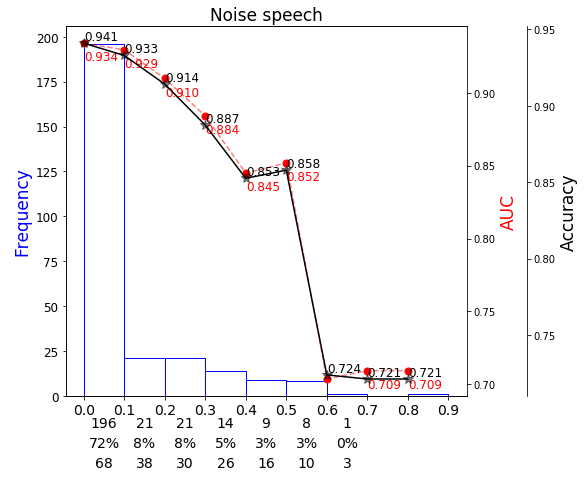

In [60]:
roisc=ur
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots(figsize=(8,6))
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2),facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x,rois in zip(counts, bin_centers,roisc):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -20), fontsize=14,textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), fontsize=14,textcoords='offset points', va='top', ha='center')
    # ROIs
    ax.annotate(rois, xy=(x, 0), xycoords=('data', 'axes fraction'),
    xytext=(0, -60),fontsize=14, textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed',alpha=0.5)#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red',fontsize=17)
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.3f" % j),xy=(i,j-0.012), color ='red',fontsize=12) ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black',fontsize=17)



for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.3f" % j),xy=(i,j+0.002), color='black',fontsize=12)##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black",alpha=0.5)
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency',fontsize=17)
ax.yaxis.label.set_color('Blue')
plt.title("Noise speech", fontsize=17)
plt.tight_layout()
# #Save the image
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12)
filename='StabilitySelection_clear'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
# plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()